In [308]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU,ELU,PReLU,Dropout

import matplotlib.pyplot as plt
%matplotlib inline 

In [309]:

# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('/content/sample_data/credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [311]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [312]:
import seaborn as sns

In [313]:
dis=[i for i in df.columns if len(df[i].unique())>10]
print(len(dis))

19


In [314]:
cont=[i for i in df.columns if i not in dis]
df[cont].head()

,SEX,EDUCATION,MARRIAGE,PAY_5,PAY_6,defaulted
0,2,2,1,-2,-2,1
1,2,2,2,0,2,1
2,2,2,2,0,0,0
3,2,2,1,0,0,0
4,1,2,1,0,0,0


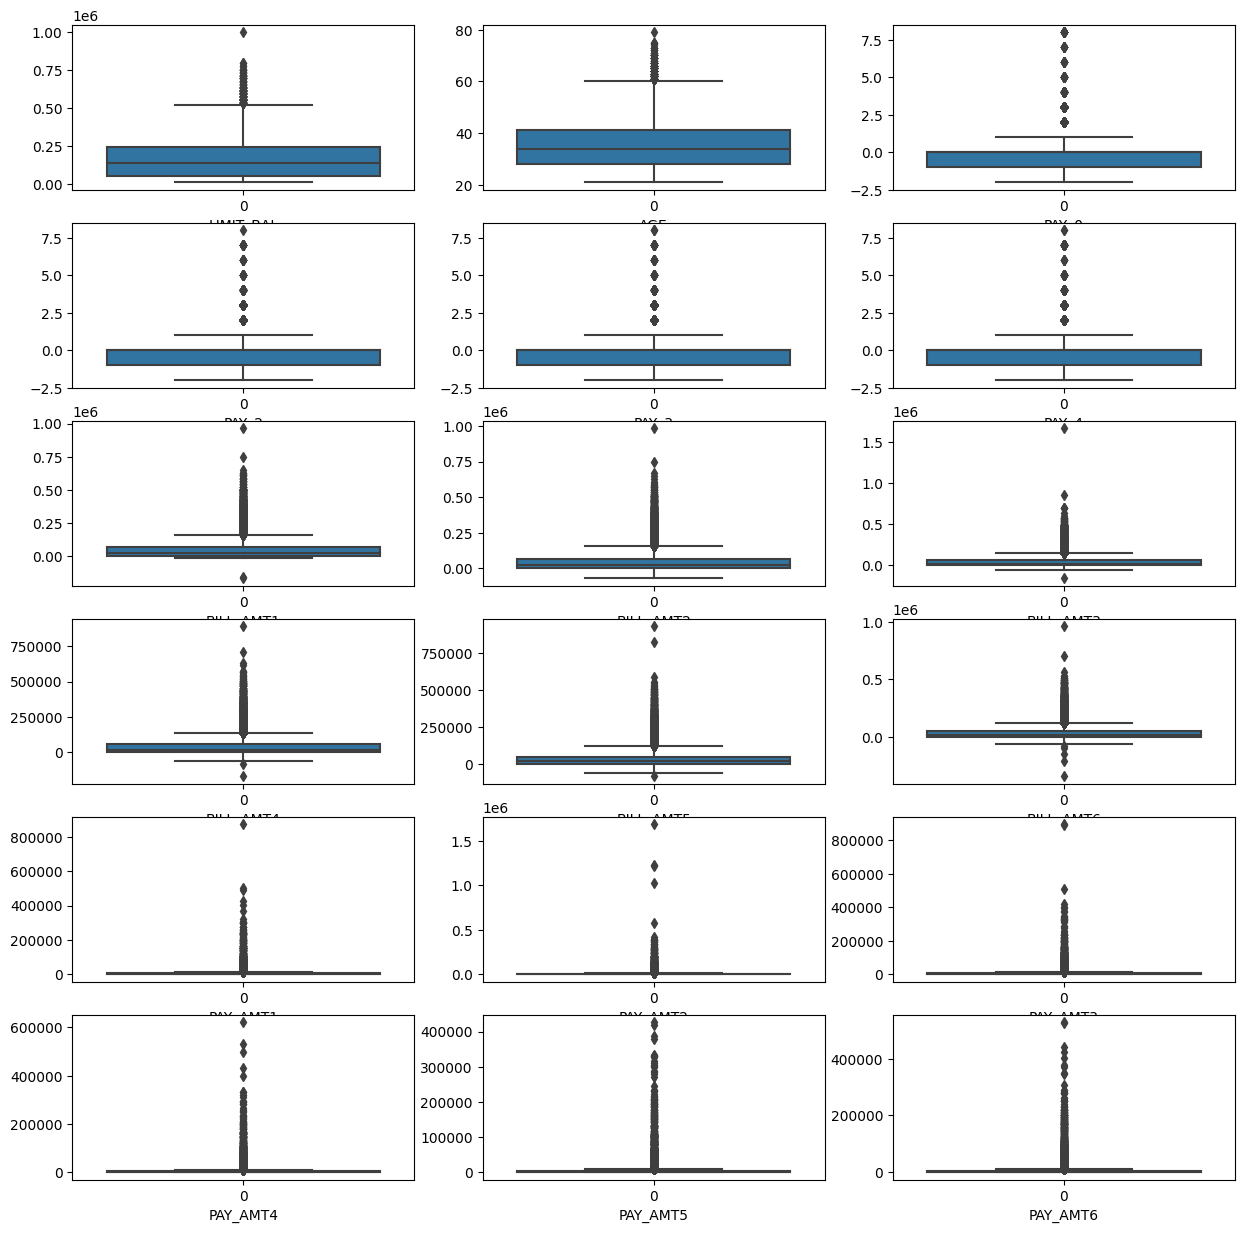

In [315]:
fig=plt.figure(figsize=(15,15))
c=1
for i in dis:
  if i!="ID":
    plt.subplot(6,3,c)
    plt.xlabel(i)
    sns.boxplot(df[i])
    c=c+1
plt.show()


In [316]:
def trt_out(df,col):
  for i in col:
    if i !="ID":
      q1 = np.quantile(df[i],0.25)
      q3 =np.quantile(df[i],0.75)
      iqr=q3-q1
      lr=q1 - (1.5*iqr)
      ur=q3 + (1.5*iqr)
      df[i]=np.where(df[i]>ur,ur,
                     np.where(df[i]<lr,lr,df[i]))
      

In [317]:
df1=df.copy()
trt_out(df1,dis)

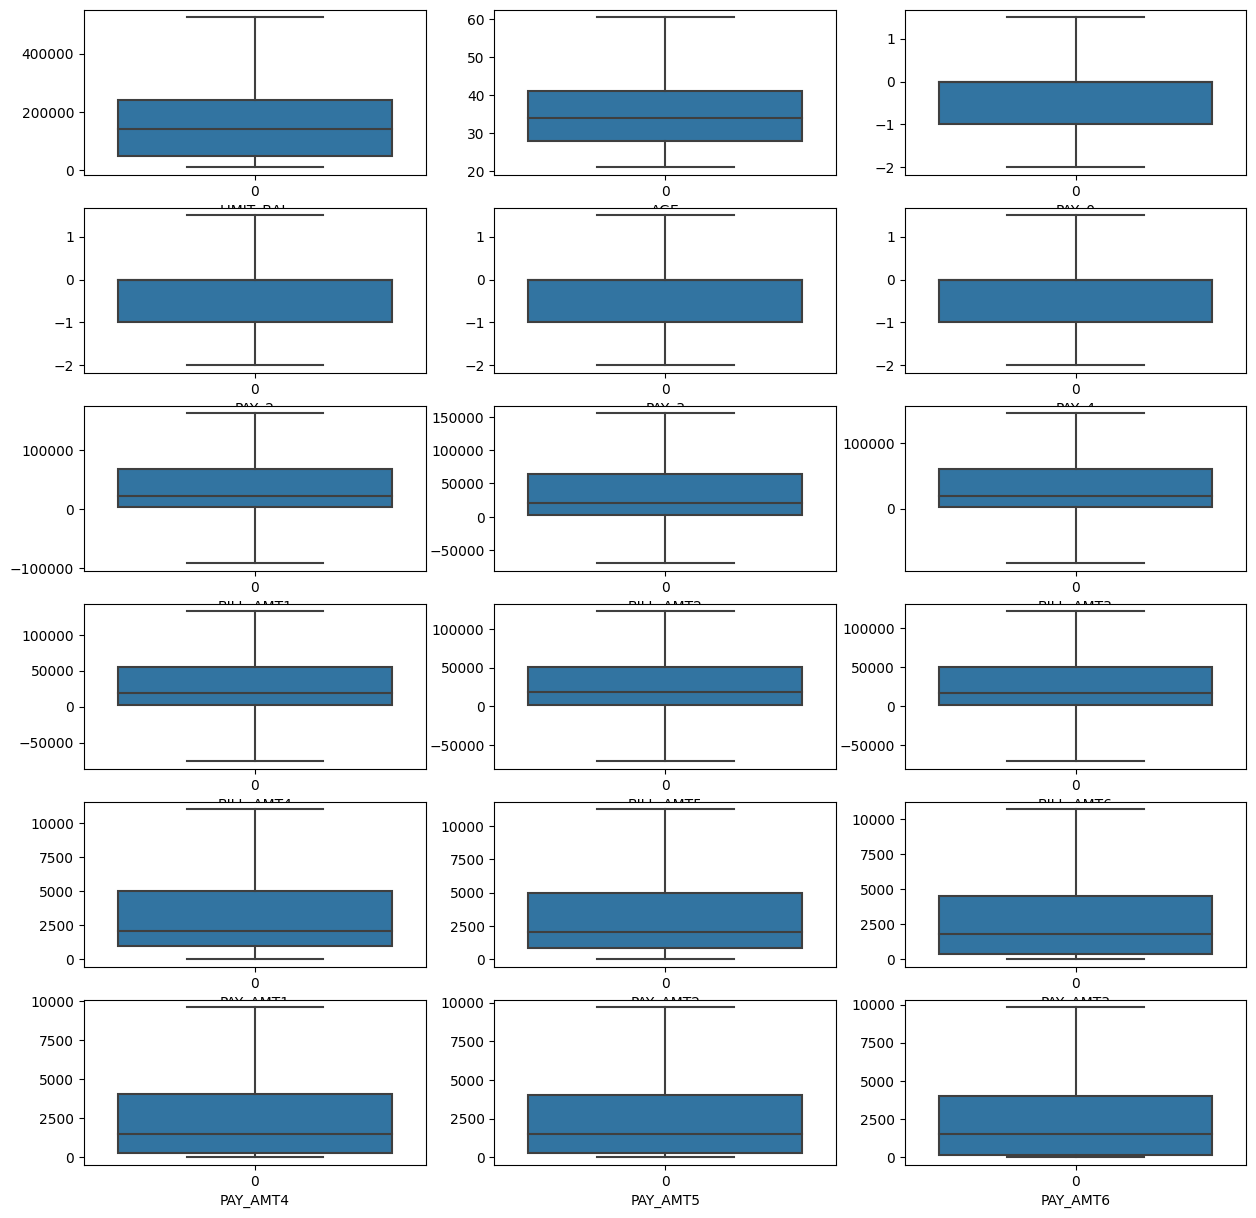

In [318]:
fig=plt.figure(figsize=(15,15))
c=1
for i in dis:
  if i!="ID":
    plt.subplot(6,3,c)
    plt.xlabel(i)
    sns.boxplot(df1[i])
    c=c+1
plt.show()


In [319]:
y=df1.pop("defaulted")
X=df1
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,1.5,1.5,-1.0,-1.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1.0,1.5,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.0,-1.0,0.0,-1.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0


In [320]:
X.drop("ID",axis=1,inplace=True)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24.0,1.5,1.5,-1.0,-1.0,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26.0,-1.0,1.5,0.0,0.0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0


In [321]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [322]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [323]:
y_test[:10]

8225     0
10794    0
9163     0
26591    0
6631     0
14161    1
252      1
2566     0
3478     0
2917     0
Name: defaulted, dtype: int64

In [324]:
print(len(X.columns))
print(X.columns)
print(len(y.value_counts()))

23
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
2


In [325]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU,ELU,PReLU,Dropout

In [326]:
cls=Sequential()
cls.add(Dense(100,kernel_initializer="he_uniform",activation="relu",input_dim=23))
cls.add(Dense(100,kernel_initializer="he_uniform",activation="relu"))
cls.add(Dense(100,kernel_initializer="he_uniform",activation="relu"))
cls.add(Dense(100,kernel_initializer="he_uniform",activation="relu"))
cls.add(Dense(10,kernel_initializer="he_uniform",activation="relu"))
cls.add(Dense(10,kernel_initializer="he_uniform",activation="relu"))
cls.add(Dense(2,kernel_initializer="glorot_uniform",activation="sigmoid"))
cls.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [327]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_train.shape

(24000, 2)

In [328]:
md=cls.fit(X_train,y_train,validation_split=0.30,batch_size=20,epochs=40)

Epoch 1/40
840/840 [==============================] - 5s 4ms/step - loss: 0.4765 - accuracy: 0.7989 - val_loss: 0.4506 - val_accuracy: 0.8024
Epoch 2/40
840/840 [==============================] - 3s 3ms/step - loss: 0.4452 - accuracy: 0.8163 - val_loss: 0.4565 - val_accuracy: 0.8043
Epoch 3/40
840/840 [==============================] - 3s 3ms/step - loss: 0.4348 - accuracy: 0.8192 - val_loss: 0.4486 - val_accuracy: 0.8097
Epoch 4/40
840/840 [==============================] - 4s 4ms/step - loss: 0.4267 - accuracy: 0.8202 - val_loss: 0.4440 - val_accuracy: 0.8090
Epoch 5/40
840/840 [==============================] - 3s 3ms/step - loss: 0.4210 - accuracy: 0.8215 - val_loss: 0.4502 - val_accuracy: 0.8089
Epoch 6/40
840/840 [==============================] - 3s 3ms/step - loss: 0.4145 - accuracy: 0.8236 - val_loss: 0.4513 - val_accuracy: 0.8101
Epoch 7/40
840/840 [==============================] - 3s 3ms/step - loss: 0.4085 - accuracy: 0.8264 - val_loss: 0.4524 - val_accuracy: 0.8122
Epoch 

In [329]:
y_pred=cls.predict(X_test)

188/188 [==============================] - 0s 1ms/step


In [330]:
y_pred

array([[0.9926603 , 0.00746925],
       [0.88097227, 0.11692229],
       [0.7800205 , 0.22107486],
       ...,
       [0.9937624 , 0.00663061],
       [0.23971216, 0.76830953],
       [0.94277704, 0.05091179]], dtype=float32)

In [331]:
test_val=np.argmax(y_pred, axis = 1)
test_val[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [337]:
[i[1] for i in y_test[:10]]

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]